<a href="https://colab.research.google.com/github/yanos84/Tutorials/blob/main/Unsupervised_TUTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KMeans
Generating three clusters with a total of 500 individuals, each coded in two
dimensions:

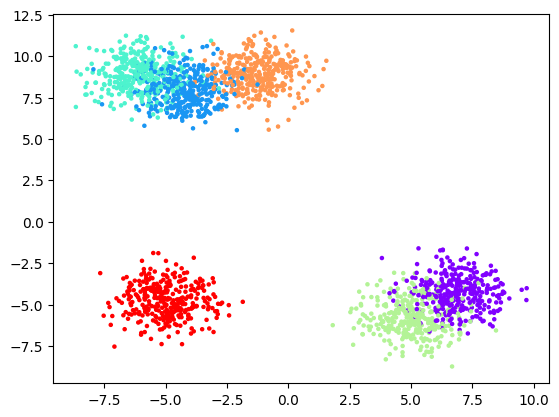

In [44]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# Generate data with 4 centers as requested
x,y=make_blobs(n_samples=2000,n_features=2,centers=6)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow', s=5)

Now, we use the sklearn implementation of KMeans to detect those clusters:

In [ ]:
from sklearn.cluster import KMeans as km
kmeans = km(n_clusters=4, max_iter=500).fit(x)

We can plot the results to see if Kmeans clustering meets the original distibution:

In [45]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='rainbow', s=5)
#

NameError: name 'kmeans' is not defined

##Quality metrics
### Silouhette
The silhouette score is a metric used to evaluate the quality of clustering results. It quantifies how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Here's the mathematical formula for the silhouette score:

For each data point _i_:

1.  **a(_i_)**: The mean distance between _i_ and all other points in the same cluster. This measures how well _i_ is assigned to its own cluster (cohesion).

2.  **b(_i_)**: The minimum mean distance between _i_ and all points in the *next nearest* cluster. This measures how well _i_ is separated from other clusters (separation).

The silhouette coefficient s(_i_) for a single data point _i_ is then calculated as:

```
s(i) = (b(i) - a(i)) / max(a(i), b(i))
```

The overall **Silhouette Score** for the clustering is the average of s(_i_) for all data points.

In [ ]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(x, kmeans.labels_)
print(f"Silhouette Coefficient: {sil}")
#

Silhouette Coefficient: 0.5904498812892639


##  Calinski–Harabasz Index (Variance Ratio Criterion)



Given:
- Dataset $X = \{x_1, x_2, \dots, x_n\}$ with $n$ samples  
- Partitioned into $k$ clusters $C_1, C_2, \dots, C_k$  
- Each cluster $C_j$ has size $n_j$ and centroid $\mu_j$  
- Overall mean of the dataset: $\mu$

### 1. Between-cluster dispersion matrix


$
B_k = \sum_{j=1}^{k} n_j \, (\mu_j - \mu)(\mu_j - \mu)^T
$



### 2. Within-cluster dispersion matrix


$
W_k = \sum_{j=1}^{k} \sum_{x_i \in C_j} (x_i - \mu_j)(x_i - \mu_j)^T
$



### 3. Calinski–Harabasz Index


$
CH(k) = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n-k}{k-1}
$



Where:
- $\text{Tr}(\cdot)$ = matrix trace (sum of diagonal elements, equivalent to variance in Euclidean space).  
- The factor $\frac{n-k}{k-1}$ normalizes the ratio for dataset size and number of clusters.

---

##  Explanation

- **Between-cluster dispersion (\(B_k\))**: Measures how far cluster centroids are from the global mean, weighted by cluster size.  
- **Within-cluster dispersion (\(W_k\))**: Measures how tightly points are grouped around their cluster centroid.  
- **Calinski–Harabasz Index (\(CH(k)\))**: Ratio of separation to compactness, adjusted for dataset size and number of clusters.

### Interpretation
- **High \(CH(k)\)** → Clusters are well-separated and internally compact.  
- **Low \(CH(k)\)** → Clusters overlap or are poorly defined.

In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch = calinski_harabasz_score(x, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch}")
#
#

Calinski-Harabasz Index: 4613.135681275476


## Best K computation

In [ ]:
import numpy as np

inertias = np.zeros(20)
calinski_harabasz_scores = np.zeros(20)
silhouette_scores = np.zeros(20)
for i in range(2,22):
  kmeans = 0
  kmeans = km(n_clusters=i, max_iter=500).fit(x)
  inertias[i-2] = kmeans.inertia_
  calinski_harabasz_scores[i-2] = calinski_harabasz_score(x, kmeans.labels_)
  silhouette_scores[i-2] = silhouette_score(x, kmeans.labels_)


0.5643967999631606
0.5626600821751354
0.5278409077379784
0.6361977687298863
0.6016712603337517
0.5261288746182312
0.5273884094320757
0.4734155786865987
0.4246319126338351
0.38138943607578374
0.3207480171453355
0.34283670358314566
0.33309907021841434
0.32680918205333603
0.329868329230572
0.3354365101477138
0.3250155715403351
0.32924955150045426
0.3346172070693004
0.3340008750334296


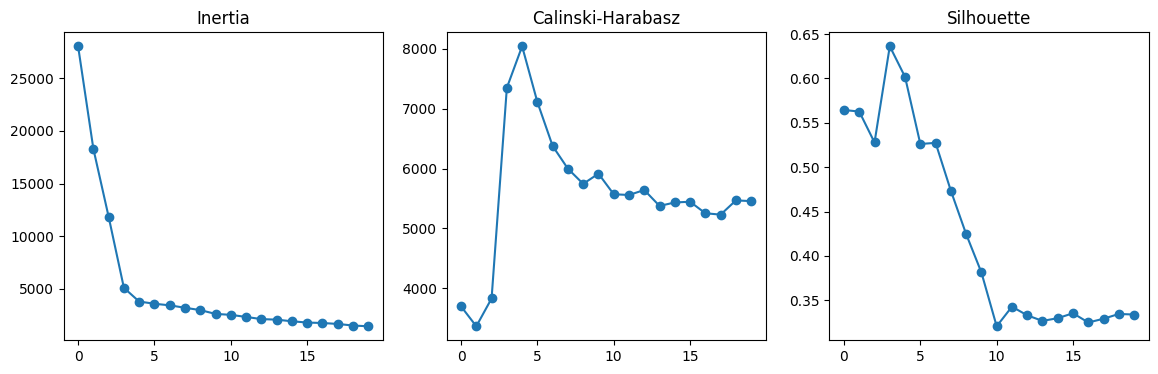

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.plot(range(20), inertias, marker='o')
plt.title("Inertia")

plt.subplot(132)
plt.plot(range(20), calinski_harabasz_scores, marker='o')
plt.title("Calinski-Harabasz")

plt.subplot(133)
plt.plot(range(20), silhouette_scores, marker='o')
plt.title("Silhouette")
plt.show()
#



---

#KMedoids
We have to install

```
scikit-learn-extra
```
first:




In [2]:
!pip install scikit-learn-extra

Then, we have to downgrade numpy to a <2.0 version (or simply install it if other platform is used)

In [3]:
!pip install "numpy<2"

Now, we simply use KMedoids like Kmeans:

In [7]:
from sklearn_extra.cluster import KMedoids

kmed = KMedoids(n_clusters=6, method='pam')
kmed.fit(x)
labels = kmed.labels_

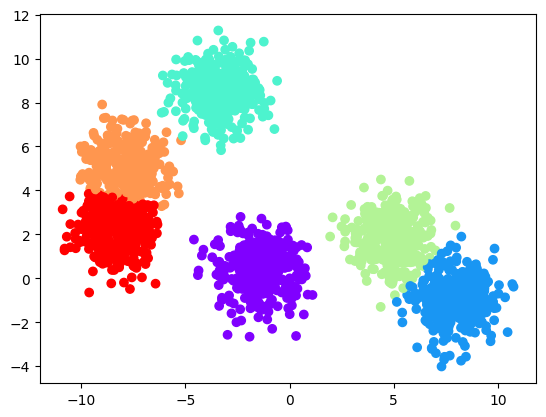

In [8]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow')

## Another library implementing KMedoids

In [1]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=3fc3b9b5f703f579fba7372f51398c0890508ecc9e4140d2af73106db1939d0e
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [9]:
from pyclustering.cluster.kmedoids import kmedoids
import numpy as np

# initial medoids indexes (random or chosen)
initial_medoids = [0, 100, 200, 300]

kmed = kmedoids(x.tolist(), initial_medoids)
kmed.process()
clusters = kmed.get_clusters()
medoids = kmed.get_medoids()

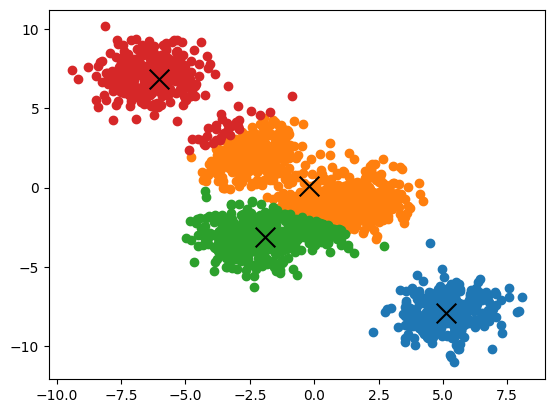

In [10]:
for cluster in clusters:
    points = np.array([x[i] for i in cluster])
    plt.scatter(points[:, 0], points[:, 1])

# Plot medoids
med = np.array([x[i] for i in medoids])
plt.scatter(med[:, 0], med[:, 1], marker='x', s=200, c='black')

plt.show()



---
# Hierarchical Clustering

AGNES (AGglomerative NESting) is the classic Agglomerative Hierarchical Clustering algorithm. In `scikit‑learn`, it’s implemented via the `AgglomerativeClustering class`.

First, we import necessary packages:


In [19]:
from sklearn.cluster import AgglomerativeClustering as AG
from scipy.cluster.hierarchy import dendrogram, linkage

We call the `AgglomerativeClustering` class and we fix the linkage (we can use complete, average or single linkage):

In [20]:
# Initialize Agglomerative Clustering
agnes = AG(n_clusters=6, linkage='average')

# Fit and predict cluster labels
labels = agnes.fit_predict(x)


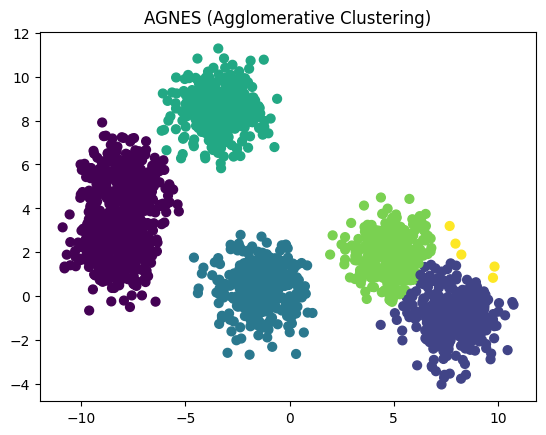

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=40)
plt.title("AGNES (Agglomerative Clustering)")
plt.show()


### Visualize Hierarchy
AGNES builds a hierarchy bottom‑up. It is great when you want hierarchical structure (e.g., dendrograms) rather than just flat clusters.
We re-generate a small simple to be able to plot properly the hierarchy.

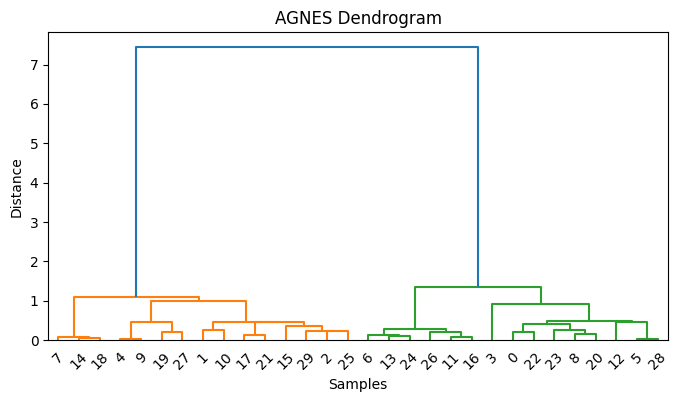

In [25]:
x,y=make_blobs(n_samples=30,n_features=1,centers=6)
agnes = AG(n_clusters=6, linkage='single')

# Fit and predict cluster labels
labels = agnes.fit_predict(x)

# Compute linkage matrix for dendrogram
Z = linkage(x, method='single')

# Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title("AGNES Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


# DBSCAN
 DBSCAN is a strong clustering technique that finds arbitrarily shaped clusters (not just spherical like K‑Means). It can automatically detects outliers/noise and doesn’t require specifying the number of clusters in advance.
 We have to fix two hyperparametes:
1.   `eps` ($ϵ$) for the neighberhood radius  
2.   `min_samples`  for the number of samples  in a neighborhood for a point to be considered as a core point.



In [37]:
from sklearn.cluster import DBSCAN

x,y=make_blobs(n_samples=2000,n_features=2,centers=6)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict cluster labels
labels = dbscan.fit_predict(x)

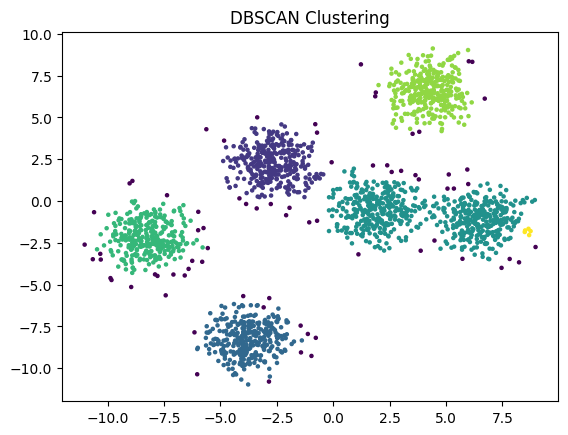

In [41]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=5)
plt.title("DBSCAN Clustering")
plt.show()

We can see that isolated nodes are considered as outliers